In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from scipy.optimize import minimize
from sklearn import clone
from tqdm import tqdm
import funcy

In [ ]:
%load_ext autoreload
%autoreload 2

### 1. 
Plot the margin as a function of C, for each of the four model specifications (linear, RBF gamma =0.01, RBF gamma=0.1, RBF gamma=1)

We should see margin decrease as a function of C


In [ ]:
import seaborn as sns

In [ ]:
sns.set_context('notebook')
sns.set_style("whitegrid")

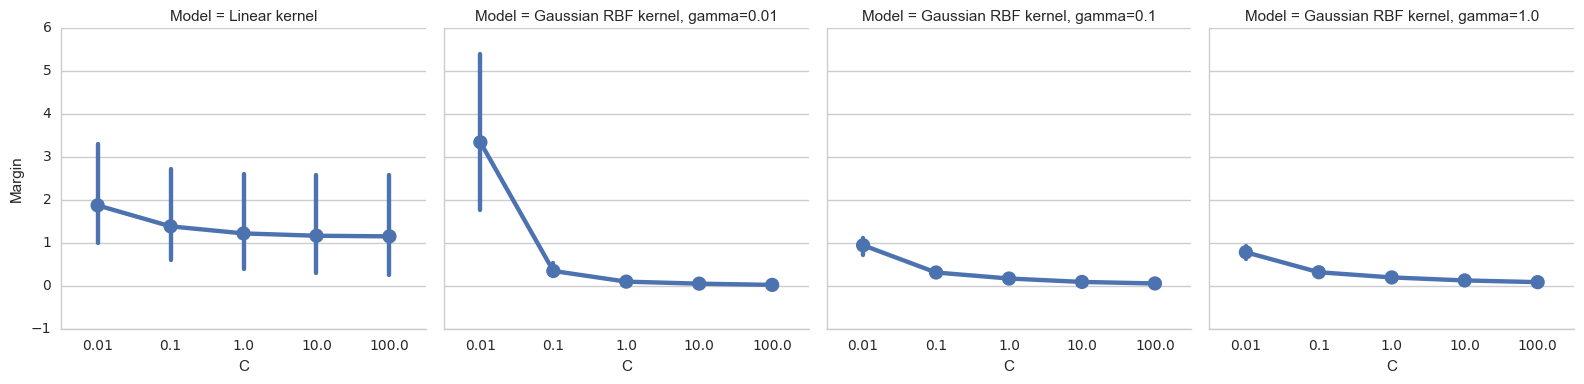

In [268]:
df = pd.read_csv('/Users/shleifer/Downloads/PB2Data.csv', index_col=0)
def plot_ciupan_df(df):
    ax = sns.factorplot(x='C', y='Margin', col='Model', data=df, join=True, dodge=True)
    plt.savefig('figure1.png')
    ax = sns.factorplot(x='C', y='NumSupportVectors', col='Model', data=df, join=True, dodge=True)
    plt.savefig('figure2.png')
    ax = sns.factorplot(x='C', y='NumSupportVectorsAtMargin', col='Model', data=df, join=True, dodge=True)
    plt.savefig('figure3.png')

Graph 2: Plot the number of support vectors as a function of C, for each of the four 
model specifications (linear, RBF gamma =0.01, RBF gamma=0.1, RBF gamma=1)


In [253]:
!open figure1.png

^C


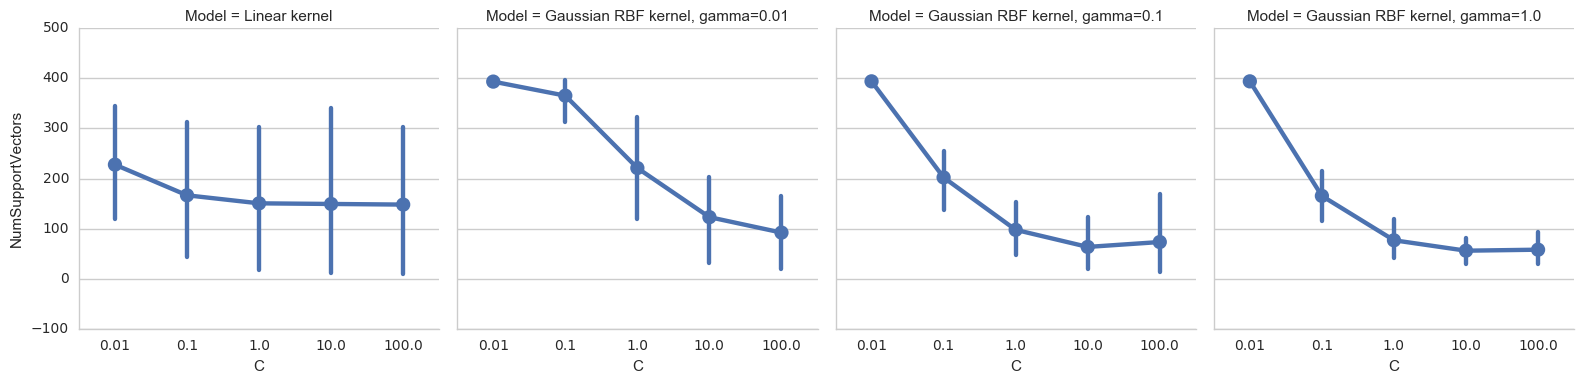

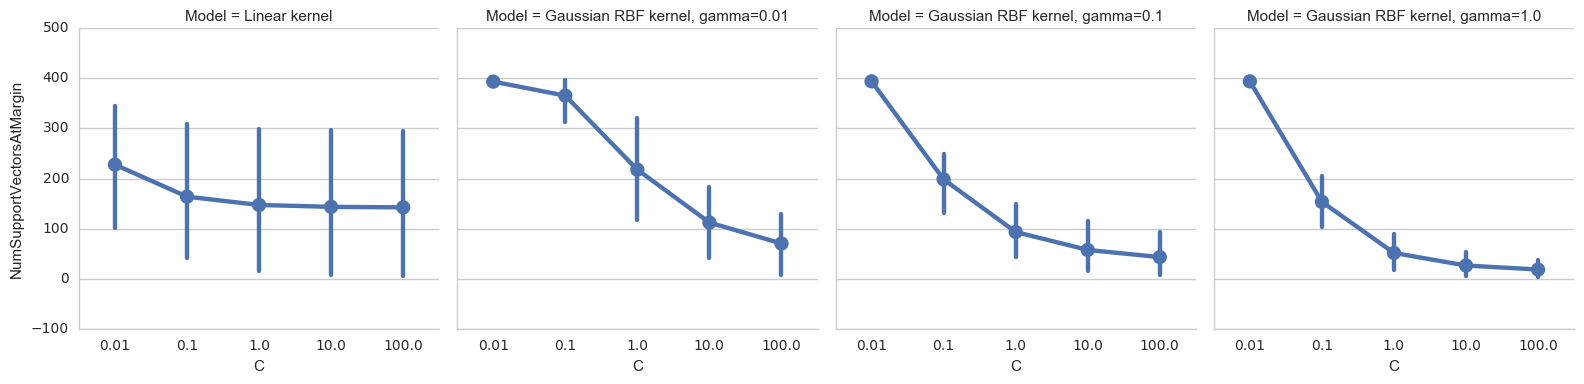

In [254]:
df.head()

,C,Dataset,Margin,Model,NumSupportVectors,NumSupportVectorsAtMargin,TrainingErrorRate
0,0.01,1,1.355864,Linear kernel,75,75,0.0350
1,0.01,1,1.360782,"Gaussian RBF kernel, gamma=0.01",398,398,0.0100
2,0.01,1,0.609763,"Gaussian RBF kernel, gamma=0.1",399,399,0.0225
3,0.01,1,0.653663,"Gaussian RBF kernel, gamma=1.0",399,399,0.4975
4,0.10,1,0.816556,Linear kernel,20,17,0.0150


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.savefig(ax, ''plt/sav)

In [ ]:
df.plot.scatter(x='C', y='Margin')

In [ ]:
from code.helpers import plotDecisionBoundary

In [ ]:
from code.logistic_regression import LogReg

In [ ]:
import glob
mnist_files = glob.glob('hw2_resources/data/*mnist*.csv')

base_path = 'hw2_resources/data/mnist_digit_{}.csv'

def read_mnist(digit):
    df = pd.read_csv(base_path.format(digit), header=None)[0]
    return df.apply(lambda x: np.array(map(int, x.split(' ')))).apply(pd.Series).as_matrix()

def compare_classifier(digit_true, digit_false):
    Xtrue = read_mnist(digit_true)
    Xfalse = read_mnist(digit_false)
    bigy = np.concatenate([
        np.ones(Xtrue.shape[0]),
        np.zeros(Xfalse.shape[0])
    ])
    bigx = np.vstack([Xtrue, Xfalse])
    return bigx, bigy

bigx, bigy = compare_classifier(0, 7)
clf = LogisticRegression().fit(bigx, bigy)
#clf = LogisticRegression().fit(bigx, bigy)

In [ ]:
bigx, bigy = compare_classifier(0, 7)
clf = LogisticRegression().fit(bigx, bigy)

In [ ]:
y.shape

In [ ]:
my_clf = LogReg().fit(bigx, bigy)

In [ ]:
#clf.coef_

In [ ]:
np.mean(y)

In [ ]:
X = read_mnist(mnist_files[0])

In [ ]:
df.columns

In [ ]:
mat = d

In [ ]:
mat.shape

In [ ]:
df.

In [ ]:
df.columns

In [ ]:
from code.helpers import read_in, plotDecisionBoundary, make_fname
from code.logistic_regression import nll, l1_reg, l2_reg, LogReg
from code.gradient_descent import gradient_descent

# 1. Logistic Regression
1. Note: Sklearn uses C = 1/λ
2. See `intercept_scaling` in sklearn.
3. When you report weights, include `W0`

In [ ]:
%%latex
$ NLL(w, w0) =  \sum(log (1 + exp  (−y(i)(wx(i) + w0))))$

### TODO: 
2. Why different coeffs than sklearn?
3. Compare L=1 to L=0
4. Results tables
5. Decision boundaries?


In [ ]:
X,y = read_in(data=3)

In [ ]:
#clf = LogReg(reg_func=l2_reg, L=1.).fit(X, y)

In [ ]:
nll(X, y, clf.coef_)

In [ ]:
clf.predict_proba(X).round(2)

In [ ]:
nll(X,y, np.squeeze(log.coef_))

In [ ]:
log.coef_

In [ ]:
log.predict_proba()

In [ ]:
X.shape

In [ ]:
#clf.optim_

In [ ]:
probas = clf.predict_proba(X)

In [ ]:
clf.score(X, y)

In [ ]:
log = LogisticRegression( C=1e6).fit(X, y)

In [ ]:
LogisticRegression?

In [ ]:
log.coef_

In [ ]:
log.score(X, y)

In [ ]:
log.pr

In [ ]:
clf.optim_

yhat = clf.predict(X)
(np.sign(yhat) == y).mean()

In [ ]:
clf = LogisticRegression(fit_intercept=True, C=1e9).fit(X, Y)
yhat = clf.predict(X)
cof = np.squeeze(clf.coef_)
cof

In [ ]:
l1_log = LogisticRegression(C=.01, penalty='l1')
l2_log = LogisticRegression(C=.01, penalty='l2')
lr_no_reg = LogisticRegression(C=1e12, penalty='l2')
#.fit(X,Y).coef_

In [ ]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [ ]:
def all_stats():
    res ={}
    for d in [1,2,3,4]:
        for C in [.0001, .001, .01,1, 1e12]:
            for pen in [ 'l2']:
                clf = LogisticRegression(C=C, penalty=pen)
                #clf = LogisticRegressionCV(penalty=pen)

                res[(d,C, pen)] = get_stats(d, clf)
    return res


def get_stats(data, clf):
    X, Y = read_in(data=data, suffix='train')
    
    Xt, Yt = read_in(data=data, suffix='test')
    Xv, Yv = read_in(data=data, suffix='validate')
    clf.fit(X, Y)
    return pd.Series(dict(te_score = clf.score(Xt, Yt),
                          tr_score = clf.score(X, Y),
                          val_score = clf.score(Xv, Yv),
                          weight_norm  = np.sum(np.abs(clf.coef_)),
                          clf=clf))

In [ ]:
res  =all_stats()

In [ ]:
clf = pd.DataFrame(res).rename_axis(['data', 'C', 'Penalty'], 1).loc['clf'].iloc[0]#.get_params()#T[['tr_score', 'oos_score', 'weight_norm']].round(2)

In [ ]:
tab1 = pd.DataFrame(res).rename_axis(['data', 'C', 'Penalty'], 1)
    
tab1.loc['clf'].iloc[0]#.get_params()#T[['tr_score', 'oos_score', 'weight_norm']].round(2)

In [ ]:
tab1.drop('clf')

In [ ]:
test = np.loadtxt('hw2_resources/data/data'+name+'_test.csv')
Xt = test[:,0:2]
onz = np.ones(Xt.shape[0])
Xt = np.hstack([Xt, onz.reshape(Xt.shape[0],1)])
Yt= np.ravel(test[:,2:3])


In [ ]:
kk

In [ ]:

val_error(w_no)

In [ ]:
test_error(w_no)

In [ ]:
wL, pL = _gradient_descent(funcy.partial(nll, L=1.), init_weights=np.copy(w), lr=.01)

In [ ]:
val_error(wL)

In [ ]:
val_error(wL1)

In [ ]:
wL1, pL1 = _gradient_descent(funcy.partial(nll, L=1., reg_func=l1_reg),
                             init_weights=np.copy(w), lr=.01)

In [ ]:
val_error(wL1)

In [ ]:
ax = paths[['w_0', 'w_1', 'w_2']].plot()
ax.set_title('No Regularization')

In [ ]:
np.copy(w) - 1

In [ ]:
ax = pL[['w_0', 'w_1', 'w_2']].plot()
ax.set_title('L2 Loss')

In [ ]:
ax = pL1[['w_0', 'w_1', 'w_2']].plot()
ax.set_title('L1 Loss')

In [ ]:
pL1[['w_0', 'w_1', 'w_2']].diff().abs().tail(20).plot()

In [ ]:
%%latex
$\bf{1.1}$ With $\lambda$ = 0, the weight vector takes longer to converge, as the weights keep expanding away from 0 for longer.
When we add the $L2$ regularization penalty, with $\lambda$=1, it takes only 90 iterations to achieve convergence.

In [ ]:
%%latex
$\bf{1.2}$ When we add the $L1$ regularization penalty, with $\lambda$=1, it takes  more iterations to achieve convergence because the coefficients that drop out bounce around zero.


In [ ]:
%%time


# 2.1 Implement Dual Form of linear SVM with slack variables

### Intro Notes
- Weight vector w as weighted linear combination of instances
- Only points on margin matter; ignore the rest, solution remains
unchanged
- Keeps instances away from the margin
- "Finding the minimum error separating hyperplane is NP-hard" 

- f(x) = <w, x> + b


### TODO:
- verify get_theta division
- tables, figures for writeup



In [ ]:
%%latex
For linear SVM, $w = \sum{y_{i}a_{i}x_{i}}$.

In [ ]:
from cvxopt import matrix, solvers

In [ ]:
from numpy.linalg import norm

In [ ]:
#def train_svm(X, y, kernel=linear_kernel, C=1.):
n_samples, n_features = X.shape
y = Y

In [ ]:
one_vec = X.dot(X[0])
kernel  = linear_kernel
C = 1.
LINEAR_KERNEL = np.dotm

In [ ]:
#P

In [ ]:
del get_weights

In [ ]:
def get_theta(sv, svy, ind, alpha, K, non_zero_mask):
        theta_0 = 0   #intercept
        for n in range(len(alpha)):
            theta_0 +=  (svy[n] - np.sum(alpha *svy * K[ind[n],  non_zero_mask]))
            theta_0 /= len(alpha)  # seems wierd
        return theta_0

In [ ]:
class SVMD(object):
    def __init__(self, X, y, kernel=LINEAR_KERNEL, C=1.):
        n_samples, n_features = X.shape
        self.X =  X
        self.y = y
        self.C = C
        self.K = np.array([[kernel(X[i], X[j]) for i in range(n_samples)] for j in range(n_samples)])
        self.kernel = kernel
        self.n_features = X.shape[1]
        self.solution = self.train()
        alpha, ind, mask = self.inspect(self.solution)
        svx = self.X[mask]
        svy = self.y[mask]
        self.svx, self.svy, self.ind, self.alpha, self.mask = svx, svy, ind, alpha[mask], mask

    def fit(self):
        self.theta = get_theta(self.svx, self.svy,  self.ind, self.alpha, self.K, self.mask)
        return self
    
    def train(self):
        X,y, kernel, C = self.X, self.y, self.kernel, self.C  # to avoid typing self
        n_samples, n_features = X.shape
        P = matrix(np.outer(y,y) * self.K)
        q = matrix(np.ones(n_samples)*-1.)
        A = matrix(y, (1, n_samples))
        b = matrix(0.)
        G = matrix(np.vstack([np.diag(np.ones(n_samples)) * -1, np.diag(np.ones(n_samples))]))
        h = matrix(np.hstack([np.zeros(n_samples), self.C *np.ones(n_samples)]))
        return solvers.qp(P, q, G, h, A, b)

    
    @staticmethod
    def inspect(solution, cutoff=1e-5):
        alpha = np.ravel(solution['x'])
        non_zero_mask = alpha > cutoff
        ind = np.arange(len(alpha))[non_zero_mask]
        print ind.mean()
        return alpha,ind, non_zero_mask
    
    def predict(self, X_new):
        self.weights = (self.alpha*self.svy).dot(self.svx)
        self.margin = 1./ norm(self.weights)
        if self.kernel == linear_kernel:    
            return np.sign(np.dot(X_new, self.weights) + self.theta)
        else:
            pred_val = [np.sum([a*y*clf.kernel(X[i], x) for a,y,x in zip(clf.alpha, clf.svy, clf.svx)]) for i in range(X_new.shape[0])]
            self.margin = None
            return np.sign(np.array(pred_val) + self.theta)

    def score(self, X_new, y_new):
        yhat = self.predict(X_new)
        assert yhat.shape ==  y_new.shape, "Shape mismatch"
        return (yhat == y_new).mean()
    def plot_boundary(self, X, y, **kwargs):
        return plotDecisionBoundary(X,y, self.predict, [-1,0,1], **kwargs)

In [ ]:
clf = SVMD(X, Y, kernel=gaussian_kernel, C=10.).fit()

In [ ]:
Xt, Yt = read_in(data=4, suffix='test')


In [ ]:
def get_stats(data, C=1., **kwargs):
    X, Y = read_in(data=data, suffix='train')
    Xt, Yt = read_in(data=data, suffix='test')
    Xv, Yv = read_in(data=data, suffix='validate')
    clf = SVMD(X, Y, C=C, **kwargs).fit()
    assert clf.C == C, 'clf.c={}'.format(clf.C)
    clf.score(Xt, Yt)
    return pd.Series(dict(n_sv=len(clf.alpha),
                          tr_score = clf.score(X, Y),
                          te_score = clf.score(Xt, Yt),
                          val_score = clf.score(Xv, Yv),
                          margin=clf.margin,
                          weights = clf.weights,
                          clf=clf
                         )) 

del X, Y
X, Y = read_in(data=1, suffix='train')


In [ ]:
%%capture
res  = pd.DataFrame({d:get_stats(d) for d in [1,2,3,4]}).T

In [ ]:
# res.loc[1].clf.ind 
assert res.loc[1].clf.ind[0] ==16, 'something changed upstream'

In [ ]:
tab = 1- res.drop('clf', 1)[['tr_score', 'val_score']].rename_axis('2D Dataset')
tab.columns = ['Training Error', 'Validation Error']
#print tab.to_latex()
#tab

In [ ]:
def show_plots(res=res):
    suffix = 'train'
    for k, row in res.iterrows():
        v = row.clf    
        X, y = read_in(k, suffix=suffix)
        score = v.score(X,y)
        v.plot_boundary(X,y, 
                        title='{} data {}, score={}'.format(suffix, k, score, row.weights)
                       )
        pl.show()

In [ ]:
show_plots()

In [ ]:
res

### 2.3 Kernels


### 2.3.0 Notes
- Increasing C allows for more nonlinearities
- Decreases # errpors
- SV boundary may not be contiguous
- Kernel width adjusts function class

### 2.3.1 Extend code to handle Gaussian RBF kernel

**(A)** What happens to the geometric meargin `1/|w|` as `C`  increases? Will this always happen when we increase C?

**(B)** What happens to the number of support vectors as C increases?

**(C)**Why would maximizing the geometric margin `1/||w||` on the training set not be an appropriate criterion for selecting C? Is there an alternative criterion that we could use for this purpose?


In [ ]:
def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x,y, sigma=1.):
    return np.exp(-norm(x-y)**2 / 2 * (sigma **2))

In [ ]:
from ggplot import *


In [ ]:
X,Y = read_in(data=4, suffix='train')

In [ ]:
%%capture
clf = SVMD(X, Y, kernel=gaussian_kernel).fit()

In [ ]:
clf.score(clf.X, clf.y)

In [ ]:
 clf.kernel 

In [ ]:
%%capture
lin = SVMD(X, Y, kernel=LINEAR_KERNEL).fit()

In [ ]:
res

In [ ]:
X,y = read_in(3)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm.coef_

In [ ]:
svm = LinearSVC(loss='hinge').fit(X, y)

In [ ]:
LinearSVC.

In [ ]:
%matplotlib inline

### 2.4 Tables describing Parameter search of `C` and `sigma`

In [ ]:
%%capture
CRange = {.01, .1, 1, 10, 100}
SRange = {.001, .01, .1, 1, 10}

c_gauss_results = pd.concat([
        pd.DataFrame({d:get_stats(d, kernel=funcy.partial(gaussian_kernel, sigma=s), C=c) 
                      for d in [1,2,3,4]}).T.assign(c=c, signma=s)
        for c in CRange
        for s in SRange
    ]).rename_axis(['data'])



In [ ]:
%%capture
c_lin_results = pd.concat([
        pd.DataFrame({d:get_stats(d,C=c) for d in [1,2,3,4]}).T.assign(c=c)
        for c in CRange]).rename_axis(['data'])

In [ ]:
c_lin_results.loc[1].iloc[-1].clf.C

In [ ]:
c_lin_results.set_index('c', append=True).sort_index()

In [ ]:
c_gauss_results.set_index('c', append=True).sort_index()

In [ ]:
show_plots(res_gauss)

# 3. Pegasos
**(2)** Observe the the margin (distance between the decision boundary and margin boundary) as a function of L

In [ ]:
MAX_EPOCHS =1e4
def pegasos(X, y,L=2, max_epochs=MAX_EPOCHS):
    N = np.array([1. / (t*L) for t in range(1, int(MAX_EPOCHS *2))])
    w =np.zeros(X.shape[1])
    t = 0
    while t < max_epochs:
        for i, row in enumerate(X):
            t +=1
            w = (1 - N[t]*L) * w
            if y[i]* w.T.dot(row) < 1:
                w = w + N[t]*y[i]*row
    return w

class Pegasos(object):
    def __init__(self):
        pass
    def fit(self, X,y, **kwargs):
        self.coef_ = pegasos(X,y, **kwargs)
        return self
    def predict(self, X):
        return X.dot(self.coef_)


In [ ]:
p = Pegasos().fit(X, y)
plotDecisionBoundary(X,y, p.predict, [-1,0,1], title='Pegasos SVM')

In [ ]:

plotDecisionBoundary(X[:4], y[:4], clf.predict, [-1,0,1])

In [ ]:
clf = LinearSVC().fit(X, y)
print clf.coef_
plotDecisionBoundary(X[:4], y[:4], clf.predict, [-1,0,1])

In [ ]:
pl.show()

In [ ]:
plotDecisionBoundary(X,np.array(y), clf.predict, [-1,0,1], title='Pegasos SVM, l={}'.format(L))

In [ ]:
pl.show()

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:

for power in range(-10, 1,2):
    L= 2^power
    p = Pegasos().fit(X, y, L=L)
    print p.coef_
    plotDecisionBoundary(X,y, p.predict, [-1,0,1], title='Pegasos SVM, l={}'.format(L))